# Performance Metrics Analysis of NeoBot's Calling and Payment Data

## **Project Overview**

In this project, we aim to extract key performance metrics and derive insights from a dataset that contains the calling and payment behavior of borrowers, worked on by **NeoBot** on **May 11th**. The dataset includes information on various call outcomes, dispositions, payment behavior, and other relevant fields. The goal is to analyze the data and generate a set of key metrics to evaluate the performance of the bot and the overall success of the calling and payment processes.

## **Objective**

The primary objective of this analysis is to calculate performance metrics based on the provided dataset and provide actionable insights that could help in optimizing NeoBot's performance. This analysis will cover a range of metrics, including but not limited to:

- **Calling Summary**: This includes the total number of borrowers called, borrowers connected, and various rates such as the pickup rate and PTP (Promise to Pay) rate.
- **Payment Behavior**: Metrics related to borrowers who paid, how many were called and paid, and the rate of payment.
- **Max and Average Calls**: Understanding the number of calls made to each borrower and the maximum number of calls made to any single borrower.
- **Call Duration Distribution**: Categorizing call duration into brackets and identifying the number of calls falling under each bracket.

## **Data Points to Extract**

This analysis will focus on extracting key performance metrics from the dataset, such as:

- **Borrowers Called**: The total number of unique borrowers attempted.
- **Borrowers Connected**: Borrowers who successfully connected with the bot.
- **Pickup Rate**: Percentage of borrowers connected out of those called.
- **Unique Pickups**: Distinct borrowers who picked up the call.
- **Unique Pickup Rate**: Percentage of unique pickups over the total called.
- **Total Calls**: The total number of calls made.
- **Promise to Pay (PTP)**: Number and rate of borrowers who made a promise to pay.
- **Borrowers Paid**: Total number of borrowers who paid.
- **Borrowers Paid (Called)**: Borrowers who were called and subsequently paid.
- **Borrowers Paid (Pickup)**: Borrowers who picked up and paid.
- **Borrowers Paid PTP**: Borrowers who promised to pay and followed through with a payment.
- **Max Calls to a Borrower**: Highest number of calls made to a single borrower.
- **Avg Calls per Borrower**: The average number of calls made per borrower.
- **Call Duration Distribution**: Categorizing call durations into various brackets (e.g., <15, 15-30 seconds) and counting the calls within each duration bracket.

---

## **Top 5 Insights**

After extracting the performance metrics, we will focus on gaining valuable insights that can inform future strategies and improvements. These insights will help in understanding aspects like:

- **Bot Performance**: Evaluating the effectiveness of NeoBot in terms of successful connections, PTP conversions, and payment collection.
- **Timing and Time-Band Effectiveness**: Understanding if certain times of day or call timings lead to better performance in terms of connections and payments.
- **Customer Behavior**: Identifying patterns in borrower responses, such as the likelihood of paying after a connection or after a PTP commitment.
- **Conversion Triggers**: Recognizing potential factors that trigger conversions, such as follow-ups after a PTP.
- **Disposition Effectiveness or Anomalies**: Analyzing the disposition categories for any anomalies or patterns indicating effective or ineffective call strategies.

## **Data Insights & Optimization**

This analysis will help in optimizing NeoBot’s calling strategies, improving borrower engagement, and identifying key areas for further improvements in the payment recovery process.



## Load & Preprocess Dataset

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel(r"C:\Users\vivek_\Downloads\Neowise Sample Data Set_Assingment .xlsx")

In [54]:
df.head()

,lenderLoanId,date,time,duration,durationBucket,disposition,remark,aiSummary
0,ff80808193ab9e840193af5d1f522922,2025-05-11,17:46:00,00:00:00,0,NaN,NaN,NaN
1,ff80808193ab9e840193af5d1f522922,2025-05-11,17:46:00,00:00:00,0,NaN,NaN,NaN
2,ff808081905ce81e01905db88df367ea,2025-05-11,17:46:00,00:00:00,0,NaN,NaN,NaN
3,ff808081905ce81e01905db88df367ea,2025-05-11,17:47:00,00:00:00,0,NaN,NaN,NaN
4,ff808081949b972701949d1493211ced,2025-05-11,17:46:00,00:00:00,0,NaN,NaN,NaN


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200696 entries, 0 to 200695
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   lenderLoanId    200696 non-null  object        
 1   date            200696 non-null  datetime64[ns]
 2   time            200696 non-null  object        
 3   duration        200696 non-null  object        
 4   durationBucket  200696 non-null  object        
 5   disposition     2433 non-null    object        
 6   remark          2433 non-null    object        
 7   aiSummary       8629 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 12.2+ MB


In [56]:
# Unique values in 'disposition' column
print("Disposition - Unique Values:")
print(df['disposition'].unique())

print("\nDisposition - Value Counts:")
print(df['disposition'].value_counts(dropna=False))

# Unique values in 'remark' column
print("\nRemark - Unique Values:")
print(df['remark'].unique())

print("\nRemark - Value Counts:")
print(df['remark'].value_counts(dropna=False))

# Unique values in 'aiSummary' column
print("\naiSummary - Unique Values:")
print(df['aiSummary'].unique())

print("\naiSummary - Value Counts:")
print(df['aiSummary'].value_counts(dropna=False))


Disposition - Unique Values:
[nan 'PTP' 'DISPUTE' 'CALL FORWARDED' 'REFUSED']

Disposition - Value Counts:
disposition
NaN               198263
PTP                 1545
DISPUTE              712
CALL FORWARDED        91
REFUSED               85
Name: count, dtype: int64

Remark - Unique Values:
[nan 'PTP: ' 'PTP: 18/05/2025' 'Reason: wrong number' 'PTP: 12/05/2025'
 'Reason: You are wrong' 'Reason: ' 'PTP: 25/05/2025' 'Reason: test'
 'Reason: already paid' 'PTP: 14/05/2025' 'PTP: 11/05/2025'
 'PTP: 13/05/2025' 'Reason: fear' 'Reason: customer in hospital'
 'PTP: 20/05/2025' 'Reason: Already paid' 'Reason: app not working'
 'Reason: Financial problems' 'PTP: 31/05/2025'
 'Reason: Unable to make payment, no specific reason given'
 'PTP: 15/05/2025' 'Reason: No reason given' 'PTP: 30/05/2025'
 'Reason: Health issues' 'Reason: No money right now'
 'Reason: other reason' 'Reason: no loan information'
 'Reason: account has been frozen' 'Reason: Medical issue'
 'Reason: double EMI deduction' '

In [57]:
# Preprocessing
import datetime

# Preprocessing
df['date'] = pd.to_datetime(df['date'])
df['borrower_id'] = df['lenderLoanId']

# Correct duration conversion function
def time_to_seconds(t):
    if isinstance(t, datetime.time):
        return t.hour * 3600 + t.minute * 60 + t.second
    return 0

df['duration_sec'] = df['duration'].apply(time_to_seconds)

# Duration Buckets
bins = [-1, 15, 30, 45, 60, float('inf')]
labels = ['<15', '15–30', '31–45', '46–60', '>60']
df['duration_bucket'] = pd.cut(df['duration_sec'], bins=bins, labels=labels, right=True)


In [58]:
print(df['duration_bucket'].value_counts())

duration_bucket
<15      195972
15–30      1311
31–45      1302
46–60      1084
>60        1027
Name: count, dtype: int64


## Performance Metrics

###  1) Borrowers Called

In [59]:
borrowers_called = df['borrower_id'].nunique()
print("Borrowers Called:", borrowers_called)


Borrowers Called: 27992


 ### 2) Borrowers Connected + Pickup Rate

Borrowers Connected: 2373
Pickup Rate (%): 8.48


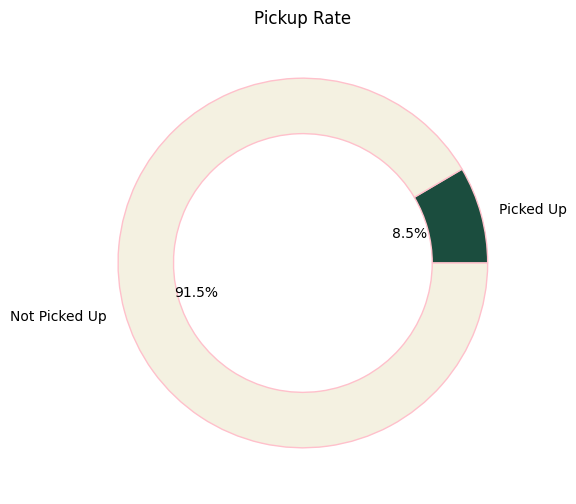

In [136]:
import matplotlib.pyplot as plt

connected_df = df[df['disposition'].notnull()]
borrowers_connected = connected_df['borrower_id'].nunique()
pickup_rate = borrowers_connected / borrowers_called * 100

print("Borrowers Connected:", borrowers_connected)
print("Pickup Rate (%):", round(pickup_rate, 2))

# Visual with reduced plot size
plt.figure(figsize=(6, 6))  # Reduced size of the plot

# Adding border around the pie chart slices
plt.pie(
    [pickup_rate, 100 - pickup_rate], 
    labels=["Picked Up", "Not Picked Up"],
    autopct='%1.1f%%', 
    colors=['#1B4D3E', '#F4F1E1'],
    wedgeprops={'width': 0.3, 'edgecolor': 'pink', 'linewidth': 1}  # Added border with black color and 2px thickness
)

plt.title("Pickup Rate")
plt.show()


### 3) Total Calls

In [153]:
total_calls = len(df)
print("Total Calls:", total_calls)


Total Calls: 200696


### 4) Unique Pickups & Rate

In [61]:
unique_pickups = connected_df['borrower_id'].nunique()
unique_pickups_rate = unique_pickups / borrowers_called * 100

print("Unique Pickups:", unique_pickups)
print("Unique Pickups Rate (%):", round(unique_pickups_rate, 2))


Unique Pickups: 2373
Unique Pickups Rate (%): 8.48


### 5) Promise To Pay (PTP) & PTP Rate

In [62]:
# Define PTP from disposition or remarks clearly marked as PTP
ptp_df = df[
    (df['disposition'].str.upper() == 'PTP') |
    (df['remark'].str.upper().str.startswith('PTP:', na=False))
]

ptp_count = ptp_df['borrower_id'].nunique()
ptp_rate = ptp_count / borrowers_connected * 100 if borrowers_connected else 0

print("PTP Count:", ptp_count)
print("PTP Rate (%):", round(ptp_rate, 2))


PTP Count: 1524
PTP Rate (%): 64.22


PTP Count: 1524
PTP Rate (%): 64.22
Borrowers - Who didn’t promise to pay: 35.78%


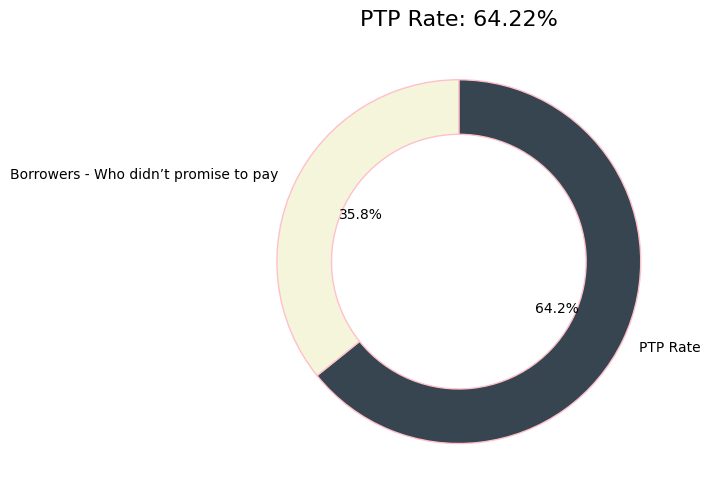

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate PTP count and rate
ptp_df = df[
    (df['disposition'].str.upper() == 'PTP') |
    (df['remark'].str.upper().str.startswith('PTP:', na=False))
]

ptp_count = ptp_df['borrower_id'].nunique()
ptp_rate = ptp_count / borrowers_connected * 100 if borrowers_connected else 0

# Print PTP count and rate
print("PTP Count:", ptp_count)
print("PTP Rate (%):", round(ptp_rate, 2))

# Print message about borrowers who didn't promise to pay
borrowers_not_promised = 100 - ptp_rate
print(f"Borrowers - Who didn’t promise to pay: {round(borrowers_not_promised, 2)}%")

# Plotting

# PTP Rate Donut Chart
plt.figure(figsize=(7, 7))  # Reduced the size of the plot

# Data for the donut chart
labels = ['PTP Rate', 'Borrowers - Who didn’t promise to pay']
sizes = [ptp_rate, 100 - ptp_rate]
colors = ['#36454F', '#F5F5DC']  # Deep Teal and Warm Taupe colors

# Create the donut chart with a hole in the middle
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False, 
    wedgeprops={'width': 0.3, 'edgecolor': 'pink', 'linestyle': 'solid', 'linewidth': 1}  # Border line added
)

# Title for the chart
plt.title(f"PTP Rate: {round(ptp_rate, 2)}%", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


### 6) Borrowers Paid + Paid (Called) + Paid (Pickup)

Borrowers Paid: 2174
Borrowers Paid (Called): 2174
Borrowers Paid (Called %): 7.77
Borrowers Paid (Pickup): 1722
Borrowers Paid (Pickup %): 72.57


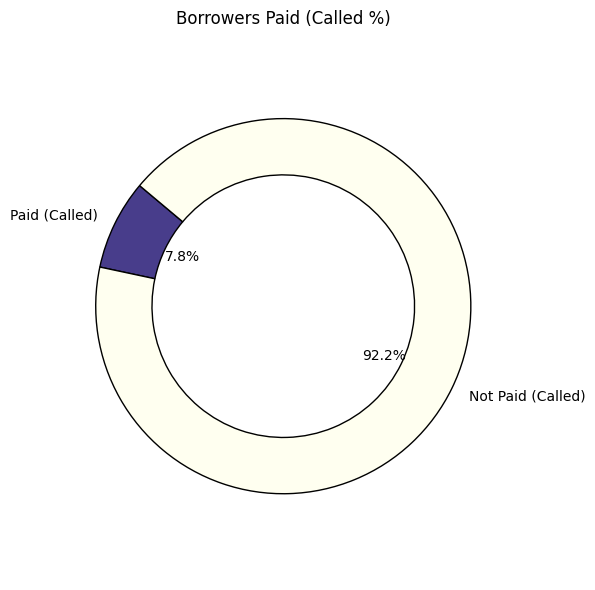

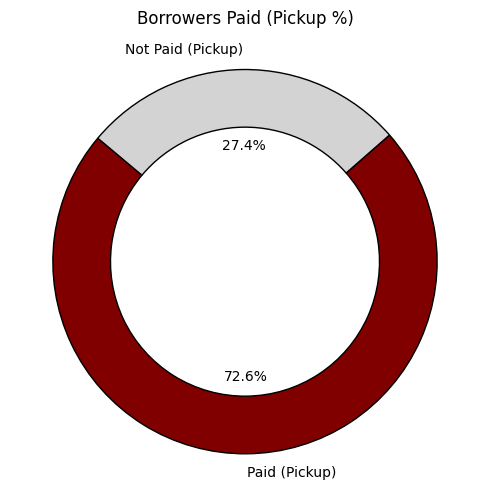

In [109]:
import matplotlib.pyplot as plt

# Enhanced paid logic by scanning AI summary for paid status
paid_df = df[df['aiSummary'].str.contains(r'\bpaid\b|\bpayment\b|\bdeducted\b', case=False, na=False)]

borrowers_paid = paid_df['borrower_id'].nunique()
borrowers_paid_called = paid_df[paid_df['borrower_id'].isin(df['borrower_id'])]['borrower_id'].nunique()
borrowers_paid_called_pct = borrowers_paid_called / borrowers_called * 100 if borrowers_called else 0

borrowers_paid_pickup = paid_df[paid_df['borrower_id'].isin(connected_df['borrower_id'])]['borrower_id'].nunique()
borrowers_paid_pickup_pct = borrowers_paid_pickup / unique_pickups * 100 if unique_pickups else 0

# Print results
print("Borrowers Paid:", borrowers_paid)
print("Borrowers Paid (Called):", borrowers_paid_called)
print("Borrowers Paid (Called %):", round(borrowers_paid_called_pct, 2))
print("Borrowers Paid (Pickup):", borrowers_paid_pickup)
print("Borrowers Paid (Pickup %):", round(borrowers_paid_pickup_pct, 2))

# --- Donut Chart: Borrowers Paid (Called %) ---
plt.figure(figsize=(6, 6))
plt.pie(
    [borrowers_paid_called_pct, 100 - borrowers_paid_called_pct],
    labels=['Paid (Called)', 'Not Paid (Called)'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#483D8B', '#FFFFF0'],  # Dark Slate Blue and Ivory colors
    wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linestyle': 'solid', 'linewidth': 1}  # Border line added
)
plt.title('Borrowers Paid (Called %)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# --- Donut Chart: Borrowers Paid (Pickup %) - Smaller Chart ---
plt.figure(figsize=(5, 5))  # Reduced size here
plt.pie(
    [borrowers_paid_pickup_pct, 100 - borrowers_paid_pickup_pct],
    labels=['Paid (Pickup)', 'Not Paid (Pickup)'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#800000', '#D3D3D3'],  # Maroon and Light Grey colors
    wedgeprops={'width': 0.3, 'edgecolor': 'black', 'linestyle': 'solid', 'linewidth': 1}  # Border line added
)
plt.title('Borrowers Paid (Pickup %)', pad=20)  # Increased padding between title and chart
plt.axis('equal')
plt.tight_layout()
plt.show()


### 7) Borrowers Paid PTP & Conversion Rate

📍 Borrowers Paid PTP: 1133
📍 Borrowers Paid PTP (%): 74.34


C:\Users\vivek_\AppData\Local\Temp\ipykernel_3540\2099950710.py:28: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vivek_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


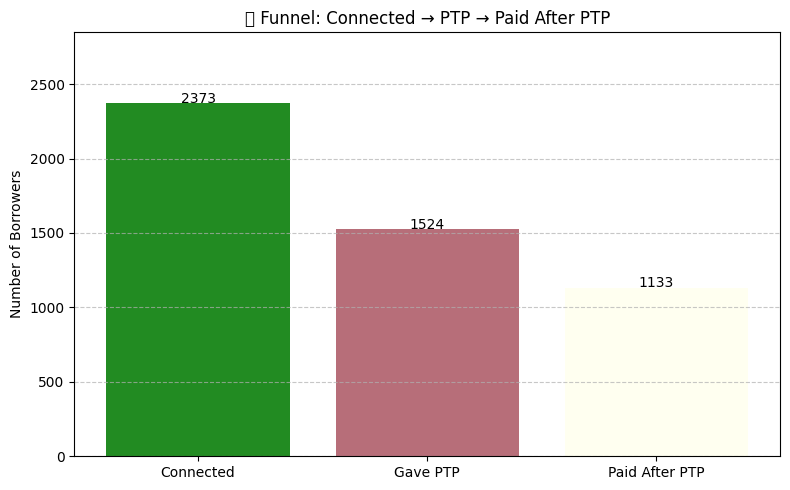

In [138]:
# Step 1: Calculate Paid Borrowers from PTP
borrowers_paid_ptp = paid_df[paid_df['borrower_id'].isin(ptp_df['borrower_id'])]['borrower_id'].nunique()
borrowers_paid_ptp_pct = borrowers_paid_ptp / ptp_count * 100 if ptp_count else 0

# Display metrics
print("📍 Borrowers Paid PTP:", borrowers_paid_ptp)
print("📍 Borrowers Paid PTP (%):", round(borrowers_paid_ptp_pct, 2))

# Step 2: Funnel Data
funnel_stages = ['Connected', 'Gave PTP', 'Paid After PTP']
funnel_values = [borrowers_connected, ptp_count, borrowers_paid_ptp]

# Step 3: Funnel-Style Bar Chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(funnel_stages, funnel_values, color=["#228B22", "#B76E79", "#FFFFF0"])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2, f'{int(height)}', ha='center', fontsize=10)

plt.title("🔻 Funnel: Connected → PTP → Paid After PTP")
plt.ylabel("Number of Borrowers")
plt.ylim(0, max(funnel_values) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 8) Max & Avg Calls per Borrower

Max Calls to a Borrower: 61
Avg Calls per Borrower: 7.17


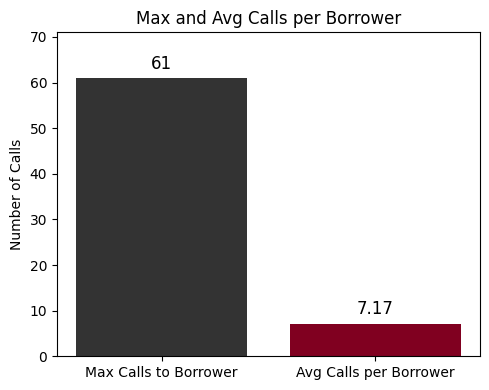

In [139]:
import matplotlib.pyplot as plt

# Calculate calls per borrower
calls_per_borrower = df.groupby('borrower_id').size()

# Max and average calls per borrower
max_calls_to_borrower = calls_per_borrower.max()
avg_calls_per_borrower = calls_per_borrower.mean()

# Display metrics in bold
print("\033[1mMax Calls to a Borrower:\033[0m", max_calls_to_borrower)
print("\033[1mAvg Calls per Borrower:\033[0m", round(avg_calls_per_borrower, 2))

# Plot the metrics (Max Calls vs Avg Calls)
metrics = ['Max Calls to Borrower', 'Avg Calls per Borrower']
values = [max_calls_to_borrower, avg_calls_per_borrower]

# Bar chart with adjusted figure size
plt.figure(figsize=(5, 4))  # Smaller chart size
plt.bar(metrics, values, color=['#333333', '#800020'])

# Adding values on top of the bars for clarity
for i, v in enumerate(values):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', fontsize=12)

# Title and labels
plt.title("Max and Avg Calls per Borrower")
plt.ylabel("Number of Calls")

# Adjust Y-axis limit to ensure space for the labels
plt.ylim(0, max(values) + 10)  # Increase the y-axis limit to create space above bars

# Adjust layout to prevent cutting off text
plt.tight_layout()

# Show the plot
plt.show()


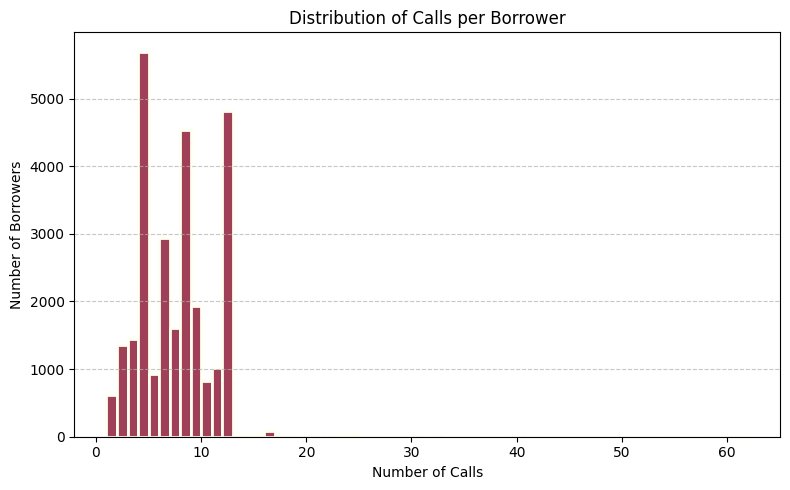

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of calls per borrower
calls_per_borrower = df.groupby('borrower_id').size()

plt.figure(figsize=(8, 5))
sns.histplot(calls_per_borrower, bins=range(1, calls_per_borrower.max() + 2), kde=False, color="#800020",edgecolor="#FFFFF0", linewidth=2)
plt.title("Distribution of Calls per Borrower")
plt.xlabel("Number of Calls")
plt.ylabel("Number of Borrowers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 9) Call Duration Distribution

📞 Call Duration Distribution
Duration Bracket (in seconds) | Count
----------------------------------------
<15                        2.0L
15–30                      1.3K
31–45                      1.3K
46–60                      1.1K
>60                        1.0K


C:\Users\vivek_\AppData\Local\Temp\ipykernel_3540\3004084794.py:50: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad=2)
C:\Users\vivek_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


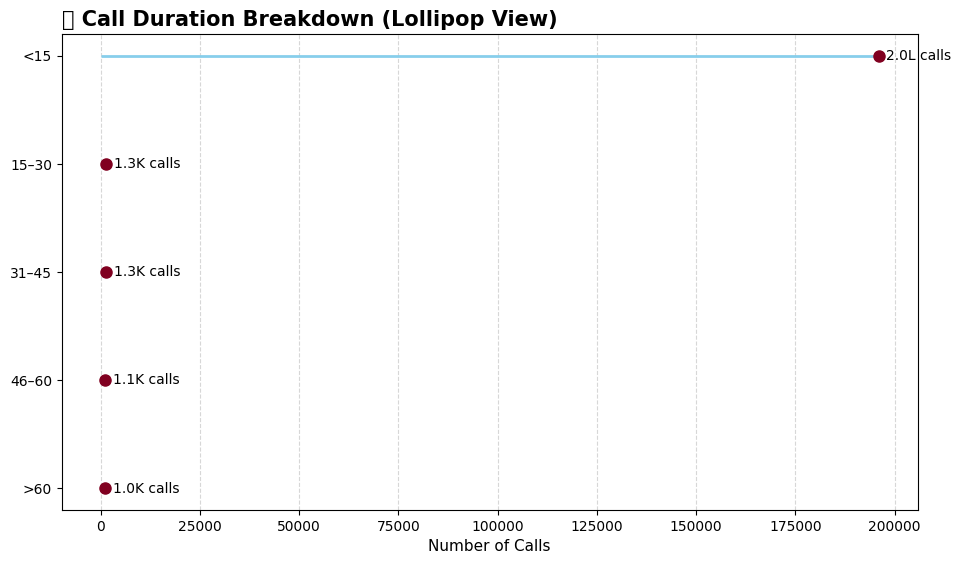

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort duration distribution in descending order
duration_distribution = df['duration_bucket'].value_counts().sort_values(ascending=False)

# Print summary values
print("📞 Call Duration Distribution")
print("Duration Bracket (in seconds) | Count")
print("-" * 40)
for label, value in duration_distribution.items():
    if value >= 100_000:
        display_val = f"{value / 100_000:.1f}L"
    elif value >= 1_000:
        display_val = f"{value / 1_000:.1f}K"
    else:
        display_val = str(value)
    print(f"{label:<26} {display_val}")

# Formatting helper
def format_count(value):
    if value >= 1_00_000:
        return f"{value / 100_000:.1f}L"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    return str(value)

# Plot
plt.figure(figsize=(10, 6))
values = duration_distribution.values
labels = duration_distribution.index
y_pos = range(len(duration_distribution))

# Draw lines
plt.hlines(y=y_pos, xmin=0, xmax=values, color='skyblue', linewidth=2)

# Draw dots
plt.plot(values, y_pos, "o", markersize=8, color='#800020')

# Annotate counts on the right
for i, v in enumerate(values):
    plt.text(v + max(values)*0.01, i, f"{format_count(v)} calls", va='center', fontsize=10)

# Styling
plt.yticks(y_pos, labels, fontsize=10)
plt.gca().invert_yaxis()  # Highest on top
plt.xlabel("Number of Calls", fontsize=11)
plt.title("📞 Call Duration Breakdown (Lollipop View)", fontsize=15, fontweight='bold', loc='left')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout(pad=2)
plt.show()



## 10) Summary Table

In [154]:
import pandas as pd
from IPython.display import display

# Format helper
def format_number(val, metric):
    if "Rate" in metric or "%" in metric: return f"{val:.2f}%"
    if abs(val) >= 1e5: return f"{val / 1e5:.2f} Lakh"
    if abs(val) >= 1e3: return f"{val / 1e3:.2f} K"
    return f"{val:.2f}"

# Metrics and corresponding values
metrics = [
    'Borrowers Called', 'Borrowers Connected', 'Pickup Rate (%)', 'Total Calls', 'Unique Pickups',
    'Unique Pickups Rate (%)', 'PTP Count', 'PTP Rate (%)', 'Borrowers Paid',
    'Borrowers Paid (Called)', 'Borrowers Paid (Called %)', 'Borrowers Paid (Pickup)',
    'Borrowers Paid (Pickup %)', 'Borrowers Paid PTP', 'Borrowers Paid PTP (%)',
    'Max Calls to a Borrower', 'Avg Calls per Borrower'
]

values = [
    borrowers_called, borrowers_connected, pickup_rate, total_calls, unique_pickups, unique_pickups_rate,
    ptp_count, ptp_rate, borrowers_paid, borrowers_paid_called, borrowers_paid_called_pct,
    borrowers_paid_pickup, borrowers_paid_pickup_pct, borrowers_paid_ptp,
    borrowers_paid_ptp_pct, max_calls_to_borrower, avg_calls_per_borrower
]

# Build summary DataFrame with formatted values
summary = pd.DataFrame({'Metric': metrics, 'Value': [round(v, 2) if isinstance(v, float) else v for v in values]})
summary['Formatted Value'] = summary.apply(lambda row: format_number(row['Value'], row['Metric']), axis=1)

# Display the table
display(summary[['Metric', 'Value', 'Formatted Value']])


,Metric,Value,Formatted Value
0,Borrowers Called,27992.00,27.99 K
1,Borrowers Connected,2373.00,2.37 K
2,Pickup Rate (%),8.48,8.48%
3,Total Calls,200696.00,2.01 Lakh
4,Unique Pickups,2373.00,2.37 K
5,Unique Pickups Rate (%),8.48,8.48%
6,PTP Count,1524.00,1.52 K
7,PTP Rate (%),64.22,64.22%
8,Borrowers Paid,2174.00,2.17 K
9,Borrowers Paid (Called),2174.00,2.17 K


# **Top 5 Insights**

## 1. **Low Pickup Rate: Room for Improvement in Bot Engagement**
### **Insight**
The pickup rate of **8.48%** is relatively low, meaning only about **8.5%** of the borrowers are engaging with the bot or responding to the calls.
### **Implication**
This low pickup rate suggests that the bot or call initiation strategy might need optimization. For instance:
- **Timing Adjustments**: Consider analyzing **time-of-day** or **day-of-week** patterns to determine if certain times yield better results.
### **Bot Interaction Strategy**
There may be an opportunity to adjust the bot’s introduction to ensure it is more engaging or aligned with borrowers' expectations.
### **Next Step**
Test different **messaging strategies**, better **personalization**, or **time-based optimizations** to increase the pickup rate and overall engagement.

---

## 2. **High Conversion Rate on "Pickup" Calls**
### **Insight**
Out of the borrowers who picked up, **72.57%** made a payment or agreed to a **promise to pay (PTP)**.
### **Implication**
This high rate of conversion on pickups indicates that once a borrower engages with the bot (or agent), the likelihood of success increases significantly. This could suggest:
- The bot or agent is doing well at **driving engagement** once the conversation starts.
- The issue is not with the **conversion process** itself but with getting borrowers to pick up the phone.
### **Next Step**
Focus on improving **engagement** at the initial stage to boost pickups, as it seems to have a strong impact on payment behavior.

---

## 3. **High PTP Conversion Rate (64.22%)**
### **Insight**
The **PTP rate** stands at **64.22%**, which suggests that over half of the connected borrowers are willing to commit to a **promise to pay**.
### **Implication**
The bot seems to be successful in obtaining commitments (i.e., **promises to pay**) from borrowers once contact is made, indicating that the negotiation process is relatively effective.
- This could be attributed to how well the bot identifies the borrower's concerns and offers solutions or compromises.
- Alternatively, this could indicate that borrowers are aware of their financial obligation and prefer setting up a clear repayment schedule rather than avoiding payment.
### **Next Step**
It’s important to analyze if **automation** can help further nurture these PTPs and move them towards an actual payment, potentially reducing the gap between PTP and actual payment.

---

## 4. **Significant Difference in Payment Behavior: Paid vs. Called**
### **Insight**
While **2174 borrowers** have paid (**2.17K**), only **7.77%** of all borrowers called made a payment, highlighting a significant gap between calls made and actual payments.
### **Implication**
The conversion rate from calls to payment is relatively low, which could suggest:
- Borrowers might respond to calls but are not always ready or able to pay.
- There might be a need to identify which borrowers are most likely to pay and focus on strategies that encourage **quick payment** rather than just a promise to pay.
### **Next Step**
Look into **borrower segmentation** to identify patterns in payment behavior and possibly adjust strategies for different segments.

---

## 5. **Max Call Frequency: Risk of Fatigue**
### **Insight**
The max calls to a borrower is **61**, which suggests that some borrowers are receiving an **excessive number of calls**.
### **Implication**
This could lead to **caller fatigue**, where borrowers may become less responsive or annoyed after multiple calls. Furthermore, this could be inefficient for the system, with time and resources being spent on borrowers who may not convert.
### **Next Step**
Investigate whether certain borrowers who have been contacted multiple times show diminishing returns. It may be beneficial to **limit calls** or focus on different channels (e.g., SMS, email) once a borrower reaches a certain threshold of calls without a positive outcome.


## **Summary: Key Insights and Strategies**

#### **Low Pickup Rate**
Improving the bot’s engagement during the initial interaction is crucial. This could be achieved by optimizing the **timing**, **messaging**, and **personalization** strategies. A more engaging introduction and tailored approach could help increase the current low pickup rate.

---

#### **High Conversion on Pickup Calls**
Once borrowers engage with the bot or agent, the likelihood of them paying increases significantly. This suggests that **engagement** strategies at the initial contact stage need to be enhanced to ensure more borrowers pick up the call in the first place.

---

#### **High PTP Rate**
A strong commitment from borrowers to pay when connected is evident, but a strategy to move **PTPs** to actual **payments** is needed. Nurturing these commitments through follow-up actions and more personalized strategies could bridge the gap between a promise and an actual payment.

---

#### **Low Payment Conversion from Calls**
The gap between the number of calls made and actual payments indicates significant room for improvement. Borrower segmentation and **behavior prediction** techniques could be used to better understand and target high-conversion borrowers, optimizing the call-to-payment process.

---

#### **Max Call Frequency**
The high frequency of calls made to certain borrowers risks causing fatigue, decreasing responsiveness, and wasting valuable resources. Reevaluating the strategy for **repeated calls** and exploring alternative channels, such as **SMS** or **email**, could reduce the strain on both the system and borrowers.

---

<div align="center">
    <h1><strong>THANK YOU</strong></h1>
</div>
